https://ai.plainenglish.io/detecting-brain-tumors-from-mri-scans-using-a-cnn-ae3c2913bde7

https://keras.io/examples/vision/image_classification_from_scratch/#run-inference-on-new-data

link with dataset: https://www.kaggle.com/sartajbhuvaji/brain-tumor-classification-mri

base code exaple to improve upon

ver livro de programação sobre assunto

escrever artigo disto para freecodecamp/video explining evertinhg in youtube channel
add this to keras docs

partilhar projetos na conta de linkedin e instagram

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt



In [2]:
train_path = r'C:\Users\tiago\Desktop\code-projects\working\Brain-tumor\data\Training'
test_path = r'C:\Users\tiago\Desktop\code-projects\working\Brain-tumor\data\Testing'
BATCH_SIZE = 10

In [3]:
train_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input, rescale=1/255.
).flow_from_directory(
    directory=train_path,
    target_size=(224, 224),
    classes=['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor'],
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 2870 images belonging to 4 classes.


In [4]:
test_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input, rescale=1/255.
).flow_from_directory(
    directory=test_path,
    target_size=(224, 224),
    classes=['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor'],
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 394 images belonging to 4 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

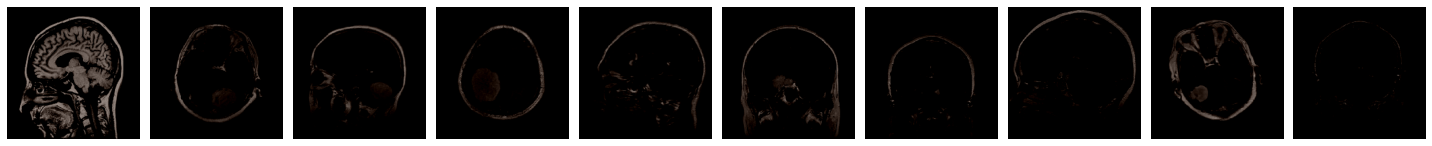

[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]


In [5]:
images, labels = next(train_batches)

def plot(img):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for imgs, ax, in zip(img, axes):
        ax.imshow(imgs)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plot(images)
print(labels)

In [6]:
model = Sequential()
model.add(Conv2D(16, (3, 3),activation=('relu'),input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3, 3),activation=('relu'))) #extra
model.add(MaxPooling2D(pool_size=(2, 2))) #extra


model.add(Conv2D(16, (3, 3),activation=('relu')))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(1000,activation=('relu')))
model.add(Dropout(0.2))
model.add(Dense(1000,activation=('relu')))
model.add(Dropout(0.2))
model.add(Dense(4,activation=('softmax')))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(test_batches, epochs=13)

Epoch 1/13
40/40 [==============================] - 7s 165ms/step - loss: 3.5404 - accuracy: 0.1512
Epoch 2/13
40/40 [==============================] - 7s 166ms/step - loss: 1.3757 - accuracy: 0.3256
Epoch 3/13
40/40 [==============================] - 7s 172ms/step - loss: 1.2581 - accuracy: 0.5479
Epoch 4/13
40/40 [==============================] - 7s 172ms/step - loss: 1.2412 - accuracy: 0.4429
Epoch 5/13
40/40 [==============================] - 7s 178ms/step - loss: 1.1959 - accuracy: 0.5241
Epoch 6/13
40/40 [==============================] - 7s 178ms/step - loss: 0.9299 - accuracy: 0.5609
Epoch 7/13
40/40 [==============================] - 7s 174ms/step - loss: 0.7004 - accuracy: 0.7399
Epoch 8/13
40/40 [==============================] - 7s 177ms/step - loss: 0.5818 - accuracy: 0.8018
Epoch 9/13
40/40 [==============================] - 7s 176ms/step - loss: 0.5291 - accuracy: 0.7914
Epoch 10/13
40/40 [==============================] - 7s 174ms/step - loss: 0.3845 - accuracy: 0.8575

understand code and predicy model and do more
evaluate model